<a href="https://colab.research.google.com/github/mrmaggoo1/MAT421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Introduction

Sets: Collection of objects {}

Naturals [N] - {1,2,3,4...}

Wholes [W] - W = N U {0}

Integers [Z] - Z = W U {-1,-2,-3...}

Rationals [Q] - Q = {p/q: p ∈ Z, q ∈ z\{0}}

Irrationals [I] - I: the set of real numbers not expressible as a fraction of integers

Reals [R] - R = Q U I

Complex Numbers [C] - C = {a+bi: a,b∈ R, i= sqrt(-1)}


1.2: Elements of Linear Algebra

Linear Subspace: A linear subspace is a subset of a vector space that is itself a vector space under the operations of vector addition and scalar multiplication defined on the larger vector space.

Span: the set of all possible linear combinations of those vectors.

Column Space: the set of all linear combinations of the columns of the matrix.

Linear Independence:  a property of a set of vectors in a vector space, where no vector in the set can be represented as a linear combination of the others.

Dimension Theorem: the Dimension Theorem states that the number of linearly independent rows in a matrix is equal to the number of linearly independent columns.

Orthogonal Projection: a linear transformation that projects a vector onto a subspace

Best Approximation Theorem: this theorem states that there is a unique vector in the subspace that is the best approximation of the original vector in terms of the distance defined by the inner product.

Cauchy-Schwarz:states that for any two vectors in a real inner product space, the dot product of the vectors is less than or equal to the product of the magnitudes of the vectors, with equality holding if the vectors are linearly dependent.

Gram-Schmidt: a method for orthonormalizing a set of linearly independent vectors in a vector space to form an orthonormal basis for the space. The process works by iteratively transforming each vector in the set into a vector that is orthogonal to the previous vectors and has a magnitude of 1.

Eigenvalues and Eigenvectors: An eigenvector of a linear transformation is a non-zero vector that, when the transformation is applied to it, only changes its magnitude and not its direction. The scalar factor by which the magnitude of the vector changes is called the eigenvalue corresponding to the eigenvector.

The Spectral Theorem of Symmetric Matrices: The Spectral Theorem for symmetric matrices states that any real symmetric matrix (i.e., a square matrix that is equal to its transpose) can be diagonalized by an orthogonal matrix, meaning it can be transformed into a diagonal matrix with real eigenvalues.


In [ ]:
# P1: row and column vectors
import numpy as np
# create row vector 
v_row = np.array([[1,-4,5,2,6]]) 
# create column vector
v_col = np.array([[1],
                  [3],
                  [5],
                  [7],
                  [10]])
# print shape of row and column vectors
print(v_row.shape)
print(v_col.shape)

(1, 5)
(5, 1)


In [ ]:
# P2: transpose row vector into column vector and calc the L1, L2, and Linf norms
# The norm of a vector is a measure of its length.
from numpy.linalg import norm
# create new column vector from transposed row vector
t_vec = v_row.T
# print vector
print(t_vec)
# calc norms using norm function using vector and norm type as arguments
n1 = norm(t_vec,1)
n2 = norm(t_vec,2);
n_inf = norm(t_vec,np.inf)
print('L1 is: %1.f'%n1)
print('L2 is: %1.f'%n2)
print('L_inf is: %1.f'%n_inf)

[[ 1]
 [-4]
 [ 5]
 [ 2]
 [ 6]]
L1 is: 18
L2 is: 9
L_inf is: 6


In [ ]:
# P3: Calc angle between vectors
from numpy import arccos, dot
# define vectors
v1 = np.array([[1,5,7]])
v2 = np.array([[3,2,4]])
# find angle theta
theta = \
    arccos(dot(v1,v2.T)/(norm(v1)*norm(v2)))
print(theta)

[[0.49675793]]


In [ ]:
# P4: Cross product of two vectors
# define vectors
v1 = np.array ([[1,2,3]])
v2 = np.array([[4,5,6]])
print(np.cross(v1,v2))

[[-3  6 -3]]


In [ ]:
# P5: Given multiple vectors, create a linear combination of those vectors
# The result of a linear combination is also a vector, which lies in the same vector space as the original vectors.
# define vectors
v1 = np.array([[1,2,3]])
v2 = np.array([[4,5,6]])
v3 = np.array([[7,8,9]])
# create L.C. vector using arbitrary scalars
x = 1*v1+2*v2+3*v3
print(x)

[[30 36 42]]


In [ ]:
# P6: Find eigenvalues and eigenvectors of a square matrix
import numpy as np
from numpy.linalg import eig
# create matrices
x = ([[2,5], [1,6]])
E1,E2=eig(x)
print('Eigenvalue = ',E1)
print('Eigenvector = ',E2)

Eigenvalue =  [1. 7.]
Eigenvector =  [[-0.98058068 -0.70710678]
 [ 0.19611614 -0.70710678]]


1.3: Linear Regression

[[1.51268328]
 [0.98399359]]


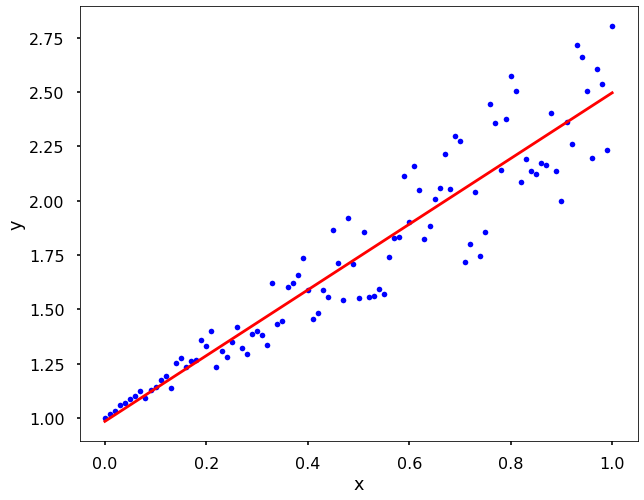

In [39]:
# P6: Perform linear regression using direct inverse method
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [40]:
# P7: Use pseudoinverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

# repeat with lunalg function
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.51268328]
 [0.98399359]]
[[1.51268328]
 [0.98399359]]
